In [1]:
#importing the packages
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import joblib # for saving algorithm and preprocessing objects
from sklearn.linear_model import LinearRegression

In [2]:
# uploading the dataset
df = pd.read_csv('pollution_us_2000_2016.csv')
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [4]:
#droping all the unnecessary features
df.drop(['Unnamed: 0','State Code', 'County Code', 'Site Num', 'Address', 'County', 'City',
         'NO2 Units', 'O3 Units' ,'SO2 Units', 'CO Units',
         'NO2 1st Max Hour', 'O3 1st Max Hour', 'SO2 1st Max Hour', 'CO 1st Max Hour'], axis=1, inplace=True)

In [5]:
df.shape

(1746661, 14)

In [6]:
df.describe()

,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,873338.000000
mean,1.282193e+01,2.541485e+01,2.389822e+01,2.612485e-02,3.920331e-02,3.605012e+01,1.870364e+00,4.492185e+00,7.115945,3.682177e-01,6.201067e-01,5.996595
std,9.504814e+00,1.599963e+01,1.516280e+01,1.136974e-02,1.534362e-02,1.978042e+01,2.760435e+00,7.679866e+00,11.937473,3.140231e-01,6.439361e-01,5.851836
min,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000
25%,5.750000e+00,1.300000e+01,1.200000e+01,1.787500e-02,2.900000e-02,2.500000e+01,2.565220e-01,8.000000e-01,1.000000,1.834580e-01,2.920000e-01,2.000000
50%,1.073913e+01,2.400000e+01,2.300000e+01,2.587500e-02,3.800000e-02,3.300000e+01,9.875000e-01,2.000000e+00,3.000000,2.926250e-01,4.000000e-01,5.000000
75%,1.771364e+01,3.570000e+01,3.300000e+01,3.391700e-02,4.800000e-02,4.200000e+01,2.325000e+00,5.000000e+00,9.000000,4.666670e-01,8.000000e-01,8.000000
max,1.395417e+02,2.670000e+02,1.320000e+02,9.508300e-02,1.410000e-01,2.180000e+02,3.216250e+02,3.510000e+02,200.000000,7.508333e+00,1.990000e+01,201.000000


In [7]:
#IQR range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

NO2 Mean             11.963636
NO2 1st Max Value    22.700000
NO2 AQI              21.000000
O3 Mean               0.016042
O3 1st Max Value      0.019000
O3 AQI               17.000000
SO2 Mean              2.068478
SO2 1st Max Value     4.200000
SO2 AQI               8.000000
CO Mean               0.283209
CO 1st Max Value      0.508000
CO AQI                6.000000
dtype: float64


In [8]:
#removing Outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1342531, 14)

In [9]:
#encoding dates
df.insert(loc=1, column='Year', value=df['Date Local'].apply(lambda year: year.split('-')[0])) 
df.drop('Date Local', axis=1, inplace=True)
df['Year']=df['Year'].astype('int')

In [10]:
#filling the FIRST Nan values with the means by the state
for i in df.columns[2:]:
    df[i] = df[i].fillna(df.groupby('State')[i].transform('mean'))

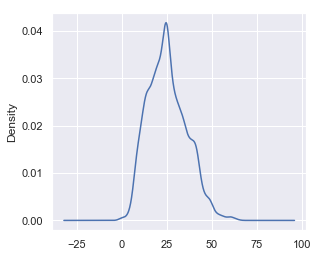

In [11]:
df[df["State"]=='Missouri']['NO2 AQI'].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

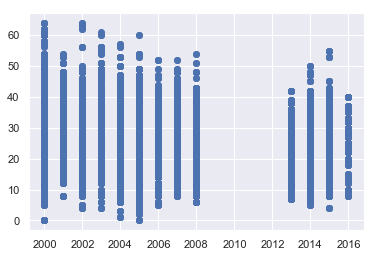

In [12]:
plt.scatter(df[df['State']=='Missouri']['Year'], df[df['State']=='Missouri']['NO2 AQI']);

In [13]:
# grouped dataset
dfG = df.groupby(['State', 'Year']).mean().reset_index()

In [14]:
dfG.shape

(494, 14)

In [15]:
dfG.describe()

,Year,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,2009.212551,10.747558,22.650210,21.228981,0.025932,0.037521,32.867243,1.165419,2.646242,3.607843,0.301163,0.465804,4.619578
std,4.743883,4.371782,7.670828,7.291912,0.004144,0.004823,4.283865,0.834911,1.578448,1.973271,0.126349,0.176256,1.580695
min,2000.000000,0.763530,1.553147,1.090909,0.012132,0.018829,17.441441,-0.033596,0.066333,0.250052,0.002597,0.021333,0.917960
25%,2006.000000,7.633976,17.124724,15.868921,0.023651,0.034929,30.528781,0.536178,1.388853,1.951765,0.216226,0.347940,3.556522
50%,2010.000000,10.617999,22.947007,21.510045,0.025795,0.037845,32.990058,0.936485,2.251052,3.371520,0.279248,0.445796,4.606004
75%,2013.000000,13.750441,28.125989,26.414369,0.028015,0.040523,35.538569,1.607425,3.776081,5.155856,0.366176,0.575920,5.613148
max,2016.000000,25.942308,42.745318,40.415730,0.040835,0.050165,43.147165,4.307074,6.656213,7.935345,0.721985,1.094762,10.577235


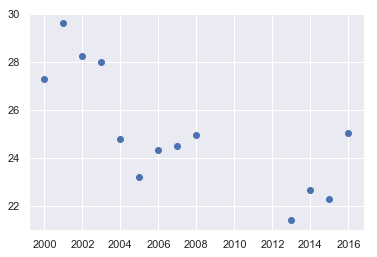

In [16]:
plt.scatter(dfG[dfG['State']=='Missouri']['Year'], dfG[dfG['State']=='Missouri']['NO2 AQI']);

In [17]:
#function for inserting a row
def Insert_row_(row_number, df, row_value): 
    # Slice the upper half of the dataframe 
    df1 = df[0:row_number] 
   
    # Store the result of lower half of the dataframe 
    df2 = df[row_number:] 
   
    # Inser the row in the upper half dataframe 
    df1.loc[row_number]=row_value 
   
    # Concat the two dataframes 
    df_result = pd.concat([df1, df2]) 
   
    # Reassign the index labels 
    df_result.index = [*range(df_result.shape[0])] 
   
    # Return the updated dataframe 
    return df_result 

In [18]:
#all the years
year_list = df['Year'].unique()
print(year_list)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


In [19]:
#all the states
state_list = df['State'].unique()
print(state_list)

['Arizona' 'California' 'Colorado' 'District Of Columbia' 'Florida'
 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana' 'Michigan'
 'Missouri' 'New Jersey' 'New York' 'North Carolina' 'Oklahoma'
 'Pennsylvania' 'Texas' 'Virginia' 'Massachusetts' 'Nevada'
 'New Hampshire' 'South Carolina' 'Connecticut' 'Iowa' 'Maine' 'Maryland'
 'Wisconsin' 'Country Of Mexico' 'Arkansas' 'Oregon' 'Wyoming'
 'North Dakota' 'Tennessee' 'Idaho' 'Ohio' 'Georgia' 'Delaware' 'Hawaii'
 'Minnesota' 'New Mexico' 'Rhode Island' 'South Dakota' 'Utah' 'Alabama'
 'Washington' 'Alaska']


In [20]:
# add more years with NaN values
for state in state_list:
    year_diff = set(year_list).difference(list(dfG[dfG['State']==state]['Year']))
    for i in year_diff:
        row_value = [state, i, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan] 
        dfG = Insert_row_(random.randint(1,494), dfG, row_value) 

c:\users\khud4\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
# fill Nan values with means by the state
for i in dfG.columns[2:]:
    dfG[i] = dfG[i].fillna(dfG.groupby('State')[i].transform('mean'))

In [22]:
total_AQI = dfG['NO2 AQI'] + dfG['SO2 AQI'] + \
              dfG['CO AQI'] + dfG['O3 AQI']
dfG.insert(loc=len(dfG.columns), column='Total_AQI', value=total_AQI)

In [23]:
dfG.head()

,State,Year,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI,Total_AQI
0,Alabama,2013,11.562322,23.000000,21.309091,0.012696,0.020709,19.181818,0.570033,2.323636,3.590411,0.195668,0.424000,3.833978,47.915299
1,Alabama,2014,8.987481,22.466541,20.776938,0.024014,0.037369,34.784499,0.926364,3.155009,4.112630,0.200941,0.384168,3.691119,63.365185
2,Alabama,2000,9.534908,22.490668,20.781931,0.022027,0.033628,31.323181,0.712854,2.533887,3.670921,0.202191,0.397144,3.740094,59.516127
3,Alabama,2015,8.583251,20.579588,18.968165,0.023281,0.036646,34.256554,0.686332,2.405431,3.539757,0.213717,0.410225,3.772559,60.537036
4,Alabama,2016,9.006580,23.916544,22.073529,0.028118,0.039787,37.069853,0.668688,2.251471,3.440884,0.198440,0.370184,3.662721,66.246988


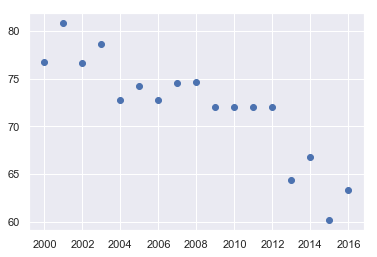

In [24]:
plt.scatter(dfG[dfG['State']=='Missouri']['Year'], dfG[dfG['State']=='Missouri']['Total_AQI']);

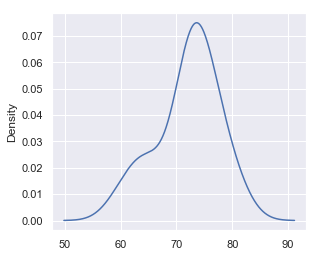

In [25]:
dfG[dfG["State"]=='Missouri']['Total_AQI'].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

In [26]:
joblib.dump(dfG, "./processed_data.joblib", compress=True)

['./processed_data.joblib']

In [27]:
testing_Data = joblib.load("./processed_data.joblib")
states = list(testing_Data['State'].unique())
print(states)

['Alabama', 'Hawaii', 'Alaska', 'Arizona', 'Country Of Mexico', 'Arkansas', 'Minnesota', 'New Mexico', 'Kentucky', 'Rhode Island', 'Delaware', 'Ohio', 'Nevada', 'Wisconsin', 'Wyoming', 'Oregon', 'South Dakota', 'Washington', 'California', 'Tennessee', 'Michigan', 'Utah', 'North Dakota', 'Connecticut', 'Maine', 'Colorado', 'South Carolina', 'New Jersey', 'District Of Columbia', 'Idaho', 'Missouri', 'Virginia', 'Georgia', 'Florida', 'Illinois', 'New Hampshire', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Maryland', 'Massachusetts', 'New York', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas']


In [28]:
from sklearn.linear_model import LinearRegression

def state_data(state, data, df):
    t = df[df['State']==state].sort_values(by='Year')
    
    clf = LinearRegression()
    clf.fit(t[['Year']], t[data])
    years = np.arange(2017, 2020, 1)
    tt = pd.DataFrame({'Year': years, data: clf.predict(years.reshape(-1, 1))})
    
    pd.concat([t, tt], sort=False).set_index('Year')[data].plot(color='red')
    t.set_index('Year')[data].plot(figsize=(15, 5), xticks=(np.arange(2000, 2020, 1)))
    
    return print(clf.predict(years.reshape(-1, 1)))

[22.30133441 21.99118935 21.6810443 ]


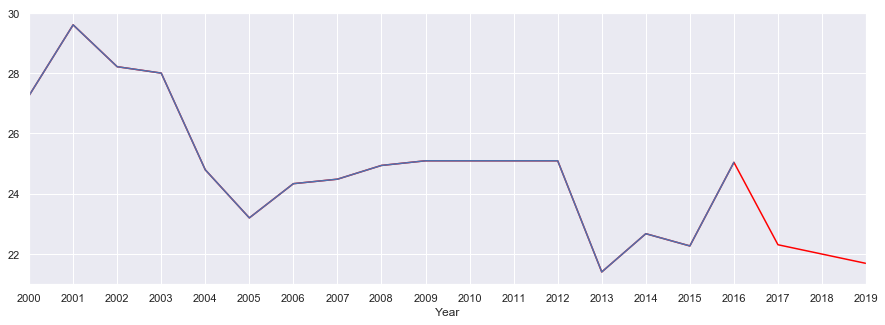

In [29]:
state_data('Missouri', 'NO2 AQI', testing_Data)